In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X_data, y_data = load_breast_cancer(return_X_y=True)

value = cross_val_score(RandomForestClassifier(criterion='entropy', n_estimators=42, random_state=42), X_data, y_data, cv=3).mean()

In [3]:
print round(value, 4)

0.9648


In [9]:
def my_score(true, pred):
    if metrics.recall_score(true, pred) > 0.5 and metrics.precision_score(true, pred) < 1.5*metrics.recall_score(true, pred):
        return metrics.precision_score(true, pred)

In [10]:
# Собственная метрика
from sklearn.metrics import make_scorer
from sklearn import metrics
scorer = make_scorer(my_score)


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [None, 5, 10, 15, 20],
    'criterion': ['entropy', 'gini']
}

X_data, y_data = load_breast_cancer(return_X_y=True)

estimator = RandomForestClassifier(random_state=42)

print('Accuracy best params and score')
result = GridSearchCV(estimator, param_grid, cv=3, scoring='accuracy').fit(X_data, y_data)
print('\tParams:', result.best_params_)
print('\tScore:', result.best_score_)


print('Custom loss best params and score')
result = GridSearchCV(estimator, param_grid, cv=3, scoring=scorer).fit(X_data, y_data)
print('\tParams:', result.best_params_)
print('\tScore:', result.best_score_)

Accuracy best params and score
('\tParams:', {'n_estimators': 50, 'criterion': 'entropy', 'max_depth': None})
('\tScore:', 0.96485061511423553)
Custom loss best params and score
('\tParams:', {'n_estimators': 10, 'criterion': 'gini', 'max_depth': None})
('\tScore:', 0.96881961106645709)


In [12]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data[:, :2]

In [25]:
print X

[[ 17.99  10.38]
 [ 20.57  17.77]
 [ 19.69  21.25]
 ..., 
 [ 16.6   28.08]
 [ 20.6   29.33]
 [  7.76  24.54]]


In [26]:
X.shape

(569, 2)

In [29]:
x_arr = X[:,0]
y_arr = X[:,1]


In [37]:
ax1 = x_arr.min()
print ax1
ax2 = x_arr.max()
print ax2
deltaX = ax2 - ax1
print deltaX

6.981
28.11
21.129


In [38]:
ay1 = y_arr.min()
print ay1
ay2 = y_arr.max()
print ay2
deltaY = ay2 - ay1
print deltaY

9.71
39.28
29.57


In [34]:
print max(deltaX,deltaY)

29.57


In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

Text(0.5,0,u'X')

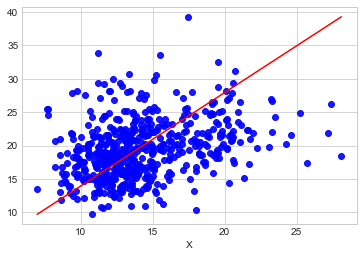

In [58]:
plt.scatter(x_arr, y_arr, c='blue', alpha=0.9)
x = np.linspace(ax1, ax2, 100)

y = np.linspace(ay1, ay2, 100)

plt.plot(x, y, c='red')

plt.plot(ax1, ay1,color = "red")
plt.xlabel('X')


In [61]:
from math import factorial 
def comb(k, n):
    assert n >= k
    return factorial(n)/(factorial(k)*factorial(n - k))

In [76]:
# 8 4
sum = 0
n = 100
for i in range(53, n+1):
    c = comb(i,n)
    sum += c
print round(sum * ((0.5)**n), 3)

0.309
